In [1]:
import numpy as np
import sympy as sp
from sympy import *
init_printing(use_unicode=True)


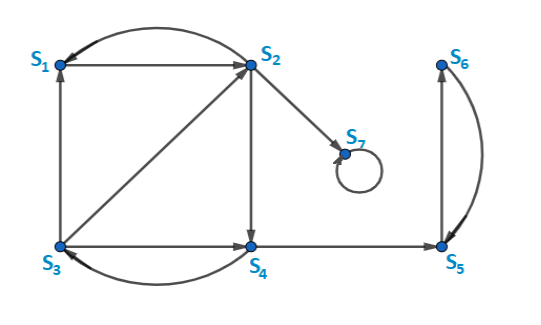

In [9]:
P=sp.Matrix([[0,1/3,1/3,0,0,0,0],[1,0,1/3,0,0,0,0],[0,0,0,1/2,0,0,0],[0,1/3,1/3,0,0,0,0],[0,0,0,1/2,0,1,0],[0,0,0,0,1,0,0],[0,1/3,0,0,0,0,1]])
P

⎡0  0.333333333333333  0.333333333333333   0   0  0  0⎤
⎢                                                     ⎥
⎢1          0          0.333333333333333   0   0  0  0⎥
⎢                                                     ⎥
⎢0          0                  0          0.5  0  0  0⎥
⎢                                                     ⎥
⎢0  0.333333333333333  0.333333333333333   0   0  0  0⎥
⎢                                                     ⎥
⎢0          0                  0          0.5  0  1  0⎥
⎢                                                     ⎥
⎢0          0                  0           0   1  0  0⎥
⎢                                                     ⎥
⎣0  0.333333333333333          0           0   0  0  1⎦

In [15]:
P**5

⎡0.0185185185185185  0.0833333333333333   0.0895061728395062  0.03703703703703
⎢                                                                             
⎢0.166666666666667   0.0462962962962963   0.101851851851852   0.09259259259259
⎢                                                                             
⎢0.0833333333333333  0.00925925925925926  0.037037037037037   0.04166666666666
⎢                                                                             
⎢0.0185185185185185  0.0833333333333333   0.0895061728395062  0.03703703703703
⎢                                                                             
⎢       0.25         0.00925925925925926  0.0925925925925926        0.625     
⎢                                                                             
⎢        0                  0.25                 0.25         0.02777777777777
⎢                                                                             
⎣0.462962962962963    0.518518518518518   0.33950617

Problem 1: Not a regular MC. If we get to NODE 7 we are stuck there.

Fix: If we get to absorbtion state, randomly jump to any other node

In [16]:
P[:,-1]=sp.ones(7,1)/7
P

⎡0  0.333333333333333  0.333333333333333   0   0  0  1/7⎤
⎢                                                       ⎥
⎢1          0          0.333333333333333   0   0  0  1/7⎥
⎢                                                       ⎥
⎢0          0                  0          0.5  0  0  1/7⎥
⎢                                                       ⎥
⎢0  0.333333333333333  0.333333333333333   0   0  0  1/7⎥
⎢                                                       ⎥
⎢0          0                  0          0.5  0  1  1/7⎥
⎢                                                       ⎥
⎢0          0                  0           0   1  0  1/7⎥
⎢                                                       ⎥
⎣0  0.333333333333333          0           0   0  0  1/7⎦

In [19]:
P**3

⎡0.0476190476190476  0.205215419501134   0.182539682539683   0.055555555555555
⎢                                                                             
⎢0.380952380952381   0.125850340136054   0.182539682539683   0.166666666666667
⎢                                                                             
⎢0.214285714285714   0.0306122448979592  0.0714285714285714  0.083333333333333
⎢                                                                             
⎢0.0476190476190476  0.205215419501134   0.182539682539683   0.055555555555555
⎢                                                                             
⎢0.214285714285714   0.0782312925170068  0.0714285714285714  0.583333333333333
⎢                                                                             
⎢0.0476190476190476   0.22108843537415   0.182539682539683           0        
⎢                                                                             
⎣0.0476190476190476  0.133786848072562   0.126984126

Problem 2: While we fixed dangling node, we didn't actually fix loops. So we can get stuck anyway.

Fix: We will give a small chance at any point to jump to any other node by introducing matrix $K$. The probability that we will jump randomly using $K$ is normally about $0.15$

In [22]:
K=1/7*sp.ones(7,7)
K

⎡0.142857142857143  0.142857142857143  0.142857142857143  0.142857142857143  0
⎢                                                                             
⎢0.142857142857143  0.142857142857143  0.142857142857143  0.142857142857143  0
⎢                                                                             
⎢0.142857142857143  0.142857142857143  0.142857142857143  0.142857142857143  0
⎢                                                                             
⎢0.142857142857143  0.142857142857143  0.142857142857143  0.142857142857143  0
⎢                                                                             
⎢0.142857142857143  0.142857142857143  0.142857142857143  0.142857142857143  0
⎢                                                                             
⎢0.142857142857143  0.142857142857143  0.142857142857143  0.142857142857143  0
⎢                                                                             
⎣0.142857142857143  0.142857142857143  0.14285714285

In [24]:
G=0.85*P+0.15*K
G

⎡0.0214285714285714  0.304761904761905   0.304761904761905   0.021428571428571
⎢                                                                             
⎢0.871428571428571   0.0214285714285714  0.304761904761905   0.021428571428571
⎢                                                                             
⎢0.0214285714285714  0.0214285714285714  0.0214285714285714  0.446428571428571
⎢                                                                             
⎢0.0214285714285714  0.304761904761905   0.304761904761905   0.021428571428571
⎢                                                                             
⎢0.0214285714285714  0.0214285714285714  0.0214285714285714  0.446428571428571
⎢                                                                             
⎢0.0214285714285714  0.0214285714285714  0.0214285714285714  0.021428571428571
⎢                                                                             
⎣0.0214285714285714  0.304761904761905   0.021428571

This $G$ is a Google PageRank Matrix

In [25]:
G**100


⎡0.0785079733350109  0.0785079733350102  0.0785079733350106  0.078507973335008
⎢                                                                             
⎢ 0.11317383169073   0.113173831690729    0.11317383169073   0.113173831690727
⎢                                                                             
⎢0.0621880075506623  0.0621880075506618  0.0621880075506621  0.062188007550660
⎢                                                                             
⎢0.0785079733350109  0.0785079733350102  0.0785079733350106  0.078507973335008
⎢                                                                             
⎢0.312384884010338   0.312384908066442   0.312384904786063   0.312384869795373
⎢                                                                             
⎢0.294349292215924   0.294349268159823    0.2943492714402    0.294349306430899
⎢                                                                             
⎣0.060888037862323   0.0608880378623225  0.060888037

In [27]:
G100=G**100
G100.col(0)

⎡0.0785079733350109⎤
⎢                  ⎥
⎢ 0.11317383169073 ⎥
⎢                  ⎥
⎢0.0621880075506623⎥
⎢                  ⎥
⎢0.0785079733350109⎥
⎢                  ⎥
⎢0.312384884010338 ⎥
⎢                  ⎥
⎢0.294349292215924 ⎥
⎢                  ⎥
⎣0.060888037862323 ⎦

## 8 node example:


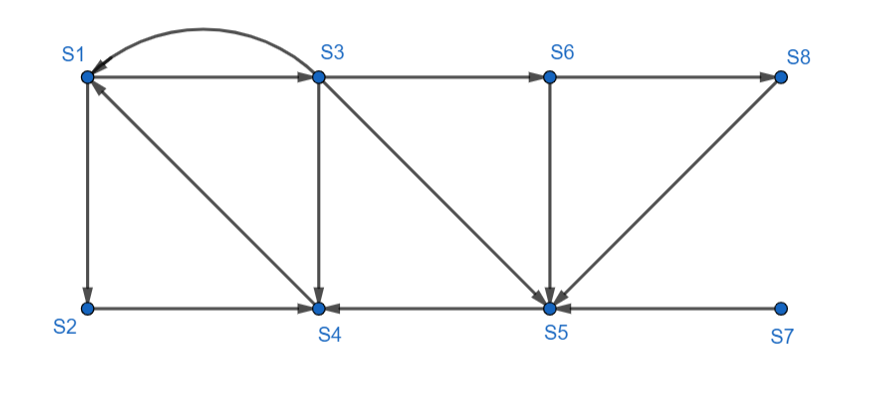

In [8]:
At=np.array([
    [0,1/2,1/2,0,0,0,0,0],
    [0,0,0,1,0,0,0,0],
    [1/4,0,0,1/4,1/4,1/4,0,0],
    [1,0,0,0,0,0,0,0],
    [0,0,0,0,0,1/2,1/2,0],
    [0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0],
    [0,0,0,0,0,1,0,0]
])
A=At.T
K=np.full((8, 8), 1/8)
G=0.85*A+0.15*K
Gp=sp.Matrix(G)**100
Gp.col(0)

⎡0.263801602907496 ⎤
⎢                  ⎥
⎢0.130865681235686 ⎥
⎢                  ⎥
⎢0.130865681235686 ⎥
⎢                  ⎥
⎢0.255579583111663 ⎥
⎢                  ⎥
⎢0.0465589572625833⎥
⎢                  ⎥
⎢0.115040937410289 ⎥
⎢                  ⎥
⎢0.0385375568365979⎥
⎢                  ⎥
⎣     0.01875      ⎦